# Section 4.14 Problems

In [62]:
%matplotlib inline
from __future__ import division
import numpy as np
import matplotlib.pyplot as plt
from uncertainties import ufloat
from uncertainties.umath import *
import pandas as pd

## Part A

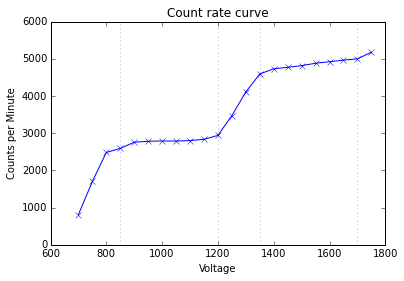

In [4]:
voltage = np.arange(700, 1800, 50)
cpm = np.array([812, 1703, 2482, 2591, 
                2758, 2783, 2791, 2788, 
                2802, 2836, 2941, 3473, 
                4109, 4592, 4731, 4771, 
                4817, 4880, 4922, 4964, 
                4999, 5177])
plt.plot(voltage, cpm, 'x-')
for a in [850, 1200, 1350, 1700]:
    plt.axvline(x=a, linestyle='dotted', alpha=0.3)
plt.xlabel("Voltage")
plt.ylabel("Counts per Minute")
plt.title("Count rate curve")
plt.show()

Note: I assume that there was a typo in the 4th data point--it should read "850, (2591)", not "850, (1591)"

From (0,800), the detector is counting ions that are formed close to the detector wire (most of the ion pairs recombine). In the (800,1200) range, the detector is in the ionization region, where all ions from the ionization event are collected but no cascade ions are produced. (1200, 1400) is the limited proportional region where increasing the voltage causes more cascade ionizations which are then collected by the detector. In (1350,1700), the detector is in the Geiger-Mueller region where it collects all ionizations in the cascade and the effects of increasing voltage are minor. Finally, above 1700V the self-discharge region begins, where the electric field is strong enough to cause ions to form without an incident particle.

## Part B

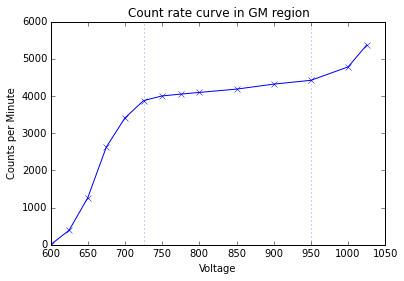

In [5]:
voltage = np.array([600, 625, 650, 675, 700, 
                   725, 750, 775, 800, 850, 
                   900, 950, 1000, 1025])
cpm = np.array([0, 392, 1261, 2627, 3410, 3876, 
                4002, 4051, 4096, 4185, 4319, 
                4422, 4782, 5371])
plt.axvline(x=725, linestyle='dotted', alpha=0.4)
plt.axvline(x=950, linestyle='dotted', alpha=0.4)
plt.plot(voltage, cpm, 'x-')
plt.xlabel("Voltage")
plt.ylabel("Counts per Minute")
plt.title("Count rate curve in GM region")
plt.show()

The operating voltage should be around 800-825V. Operating above 1025 is inadvisable because the detector will self-discharge even without radiation present.

## Part C

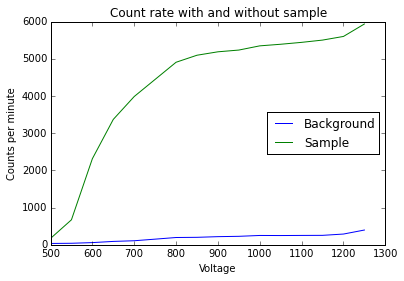

In [6]:
voltage_background = np.arange(500, 1300, 50)
cpm_background = np.array([36, 41, 59, 91, 109, 
                           152, 196, 201, 219, 
                           228, 251, 249, 252, 
                           254, 289, 397])

voltage_sample = np.array([500, 550, 600, 650, 
                           700, 800, 850, 900, 
                           950, 1000, 1050, 1100, 
                           1150, 1200, 1250])
cpm_sample = np.array([171, 672, 2314, 3371, 3986, 
                       4907, 5096, 5188, 5235, 
                       5348, 5391, 5442, 5503, 
                       5601, 5936])
plt.plot(voltage_background, cpm_background, label="Background")
plt.plot(voltage_sample, cpm_sample, label="Sample")
plt.xlabel("Voltage")
plt.ylabel("Counts per minute")
plt.legend(loc="center right")
plt.title("Count rate with and without sample")
plt.show()

The appropriate counting voltage is between 950-1050V.

## Part D

In [7]:
sc = ufloat(3270, 3270**0.5)
st = 22.00
bc = ufloat(331, 331**0.5)
bt = 9.00
activity = sc / st - bc / bt
print(activity)

111.9+/-3.3


The count rate is 112$\pm$3 cpm

## Part E

In [8]:
dt = 9.00e-6 /60
cr = ufloat(927420, 927420**0.5)
print(cr / (1 - cr * dt))

(1.0773+/-0.0013)e+06


The true count rate is 1.0773E6$\pm$1.3E3

## Part F

$\tau = \frac{n_{12}-70 n_1}{n_{12} n_1 - 70 n_1 n_{12}}$

In [9]:
tau = ((147210. - 11.) - (70. * 2120.- 11.)) / ((147210. -11.)* (2120. - 11.) - 70. * (2120. - 11.) * (147210. - 11.))

In [10]:
tau = tau * 60 # convert from minutes to seconds

In [11]:
tau

3.333248418129619e-06

The dead time is 3.33$\mu$s

## Part G

In [53]:
sample_no_cs = np.array([18921, 14632, 11985, 7337, 4511]) # cpm
sample_with_cs = np.array([21026, 16746, 14092, 9439, 6621])  # cpm
pure_no_cs = 181 # cpm
pure_with_cs = 4732 # cpm

### G.1

In [57]:
quenched_sample_values = cr_with_cs - cr_no_cs
print(quenched_sample_values)

[2105 2114 2107 2102 2110]


### G.2

In [58]:
non_quenched_standard_value = pure_with_cs - pure_no_cs
print(non_quenched_standard_value)

4551


### G.3

In [59]:
quenching_factors = non_quenched_standard_value / quenched_sample_values
print(quenching_factors)

[ 2.16199525  2.15279092  2.15994305  2.16508088  2.15687204]


### G.4

In [60]:
non_quenched_sample_counts = sample_no_cs * quenching_factors
print(non_quenched_sample_counts)

[ 40907.11211401  31499.63670766  25886.91741813  15885.19838249
   9729.64976303]


### G.5

In [61]:
sample_activities = non_quenched_sample_counts - pure_no_cs
print(sample_activities)

[ 40726.11211401  31318.63670766  25705.91741813  15704.19838249
   9548.64976303]


In [63]:
answer = pd.DataFrame({
    "Quenched Sample Values": quenched_sample_values,
    "Quenching Factors": quenching_factors,
    "Non-quenched Counts": non_quenched_sample_counts,
    "Sample Activities": sample_activities
})
print(answer)

   Non-quenched Counts  Quenched Sample Values  Quenching Factors  \
0         40907.112114                    2105           2.161995   
1         31499.636708                    2114           2.152791   
2         25886.917418                    2107           2.159943   
3         15885.198382                    2102           2.165081   
4          9729.649763                    2110           2.156872   

   Sample Activities  
0       40726.112114  
1       31318.636708  
2       25705.917418  
3       15704.198382  
4        9548.649763  


## Part H

In [25]:
thickness = np.array([0, 5, 10, 15, 20, 25, 30, 35])
counts = np.array([5922, 3901, 2876, 2181, 1623, 1145, 752, 427])
correction_factor = counts[0] / counts
print(correction_factor)

[  1.           1.51807229   2.05910987   2.71526823   3.64879852
   5.1720524    7.875       13.86885246]


In [27]:
fit = np.polyfit(thickness, np.log(correction_factor), 1)

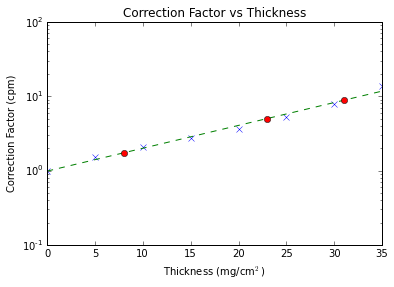

In [50]:
plt.plot(thickness, correction_factor, 'x', label="Data")

plt.ylabel('Correction Factor (cpm)')
plt.xlabel(r'Thickness (mg/cm$^2$)')
x = np.linspace(0, 35, 1000)
plt.plot(x, np.exp(fit[1] + fit[0] * x), 
         linestyle='dashed', label="Fit")
plt.title("Correction Factor vs Thickness")
plt.yscale('log')
unknown_sample_thicknesses = np.array([8, 23, 31])
unknown_counts = np.array([3722, 9421, 875])
plt.plot(unknown_sample_thicknesses, np.exp(fit[1] + fit[0] * unknown_sample_thicknesses), 'ro')
plt.show()

In [49]:
print("Thickness\tCounts\t\tCF\t\t\tCorrected Counts")
print("---------\t------\t\t--\t\t\t----------------")
for i in range(len(unknown_sample_thicknesses)):
    print("{0}\t\t{1}\t\t{2}\t\t{3}".format(
        unknown_sample_thicknesses[i],
        unknown_counts[i],
        np.exp(fit[1] + fit[0] * unknown_sample_thicknesses[i]),
        np.exp(fit[1] + fit[0] * unknown_sample_thicknesses[i]) * unknown_counts[i]
    ))

Thickness	Counts		CF			Corrected Counts
---------	------		--			----------------
8		3722		1.73234760334		6447.79777963
23		9421		5.00328331478		47135.9321086
31		875		8.80884819709		7707.74217246


## Part I

In each case below indicate: 
1. the best detection system and
2. corrections necessary to compare the counting results to a standard.

The form of the sample must not be altered.

### 1. An electroplated sample of $^{210}$Po (5.30 MeV alpha) 7$\mu$ thick

A cylindrical detector nearly in contact with the sample, with radius larger than the sample.

### 2. A solid sample of BaSO$_4$ containing $^{35}$S (0.17 MeV beta) 17 mg/cm$^2$ thick

### 3. A solid sample of ashed mammalian bone tissue containing $^3$H (0.018 MeV beta) 4 mg/cm$^2$ thick

### 4. A solid sample of adenosine phosphate conatining $^32$P (1.71 MeV beta) 22 mg/cm$^2$ thick

### 5. A solid sample of freeze-dried plant tissue containing $^{71}$As (0.81 MeV positron and 0.175 MeV gamma) 42 mg/cm$^2$ thick

### 6. A solution of ashed bone marrow containing $^{55}$Fe (6.4 keV X-ray) in dilute perchloric acid

### 7. A solution of bovine liver tissue labeled with $^{64}$Cu (1.34 MeV gamma, 0.57 MeV beta, 0.66 MeV positron) in hyamine

### 8. A solution of bartonella muris cell debris with $^{75}$Zn (ec, 1.11 MeV gamma)

### 9. A solution of pig urine containing $^{235}$Pu (5.85 MeV alpha)

### 10. A liquid dispersing agent containing colloidally-suspended funaria spores with $^{45}$Ca (0.25 MeV beta)

### 11. Gaseous BF$_3$ containing $^{18}$F (0.65 MeV positron)

## Part J

1. Juggle
2. Some kind of fire
3. taste it!
4. is one of these a gas?
5. Allow the $^3$H to offgas and collect it in a container, then count the resultant gas.